In [11]:
import pandas as pd

In [5]:

# Normalize IMDb ratings
imdb_ratings = [7.88 * 10, 8.4 * 10, 8.34 * 10, 7.55 * 10, 7.0 * 10, 8.7 * 10, 8.52 * 10, 7.5 * 10]

# Normalize Metacritic ratings
metacritic_critic_ratings = [61, 75, 73, 65, 75, 85, 85, 70]
metacritic_audience_ratings = [6.9 * 10, 6.9 * 10, 6.1 * 10, 5.2 * 10, 5.6 * 10, 8.1 * 10, 8.5 * 10, 6.1 * 10]

# Normalize Rotten Tomatoes ratings
rotten_tomatoes_critic_ratings = [54, 94, 94, 72, 90, 99, 98, 79]
rotten_tomatoes_audience_ratings = [85, 90, 59, 12, 66, 91, 95, 77]

# Create a DataFrame with the normalized ratings
ratings_data = {
    'Title': [
        "The Crown", "Fallout", "The Gilded Age", 
        "The Morning Show", "Mr. and Mrs. Smith", 
        "Shōgun", "Slow Horses", "3 Body Problem"
    ],
    'IMDb Rating': imdb_ratings,
    'Metacritic Critic': metacritic_critic_ratings,
    'Metacritic Audience': metacritic_audience_ratings,
    'Rotten Tomatoes Critic': rotten_tomatoes_critic_ratings,
    'Rotten Tomatoes Audience': rotten_tomatoes_audience_ratings
}

df = pd.DataFrame(ratings_data)
df.head()

,Title,IMDb Rating,Metacritic Critic,Metacritic Audience,Rotten Tomatoes Critic,Rotten Tomatoes Audience
0,The Crown,78.8,61,69.0,54,85
1,Fallout,84.0,75,69.0,94,90
2,The Gilded Age,83.4,73,61.0,94,59
3,The Morning Show,75.5,65,52.0,72,12
4,Mr. and Mrs. Smith,70.0,75,56.0,90,66


In [6]:
# Example weights (assuming equal importance)
weights = {
    'IMDb Rating': 0.20,
    'Metacritic Critic': 0.20,
    'Metacritic Audience': 0.20,
    'Rotten Tomatoes Critic': 0.20,
    'Rotten Tomatoes Audience': 0.20
}

In [7]:
# Normalize and calculate weighted average
df['Weighted Average Rating'] = (
    df['IMDb Rating'] * weights['IMDb Rating'] +
    df['Metacritic Critic'] * weights['Metacritic Critic'] +
    df['Metacritic Audience'] * weights['Metacritic Audience'] +
    df['Rotten Tomatoes Critic'] * weights['Rotten Tomatoes Critic'] +
    df['Rotten Tomatoes Audience'] * weights['Rotten Tomatoes Audience']
)

df = df.sort_values(by='Weighted Average Rating', ascending=False)
df.head()

,Title,IMDb Rating,Metacritic Critic,Metacritic Audience,Rotten Tomatoes Critic,Rotten Tomatoes Audience,Weighted Average Rating
6,Slow Horses,85.2,85,85.0,98,95,89.64
5,Shōgun,87.0,85,81.0,99,91,88.60
1,Fallout,84.0,75,69.0,94,90,82.40
2,The Gilded Age,83.4,73,61.0,94,59,74.08
7,3 Body Problem,75.0,70,61.0,79,77,72.40


/var/folders/fw/7zv52y095sv31wqyr0qssdth0000gn/T/ipykernel_66131/254443387.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weighted Average Rating', y='Title', data=df, palette='viridis')


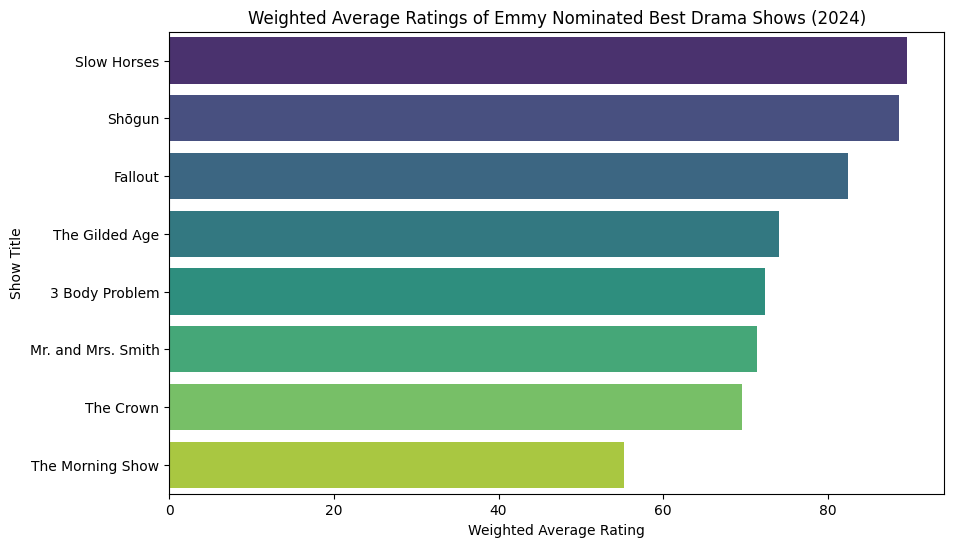

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Weighted Average Rating', y='Title', data=df, palette='viridis')
plt.title('Weighted Average Ratings of Emmy Nominated Best Drama Shows (2024)')
plt.xlabel('Weighted Average Rating')
plt.ylabel('Show Title')
plt.show()

In [9]:
# Calculate z-scores for normalization
for column in df.columns[1:]:
    df[column] = (df[column] - df[column].mean()) / df[column].std()

# Calculate weighted average of z-scores
weights = {
    'IMDb Rating': 0.20,
    'Metacritic Critic': 0.20,
    'Metacritic Audience': 0.20,
    'Rotten Tomatoes Critic': 0.20,
    'Rotten Tomatoes Audience': 0.20
}

df['Weighted Average Rating'] = (
    df['IMDb Rating'] * weights['IMDb Rating'] +
    df['Metacritic Critic'] * weights['Metacritic Critic'] +
    df['Metacritic Audience'] * weights['Metacritic Audience'] +
    df['Rotten Tomatoes Critic'] * weights['Rotten Tomatoes Critic'] +
    df['Rotten Tomatoes Audience'] * weights['Rotten Tomatoes Audience']
)

df = df.sort_values(by='Weighted Average Rating', ascending=False)
df.head()

,Title,IMDb Rating,Metacritic Critic,Metacritic Audience,Rotten Tomatoes Critic,Rotten Tomatoes Audience,Weighted Average Rating
6,Slow Horses,0.892887,1.332811,1.570295,0.829814,0.847407,1.094643
5,Shōgun,1.194001,1.332811,1.226120,0.893646,0.700829,1.069481
1,Fallout,0.692144,0.161109,0.193598,0.574487,0.664184,0.457104
2,The Gilded Age,0.591773,-0.073231,-0.494750,0.574487,-0.471800,0.025296
7,3 Body Problem,-0.813426,-0.424742,-0.494750,-0.382991,0.187804,-0.385621


/var/folders/fw/7zv52y095sv31wqyr0qssdth0000gn/T/ipykernel_66131/3035008788.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Weighted Average Rating', y='Title', data=df, palette='viridis')


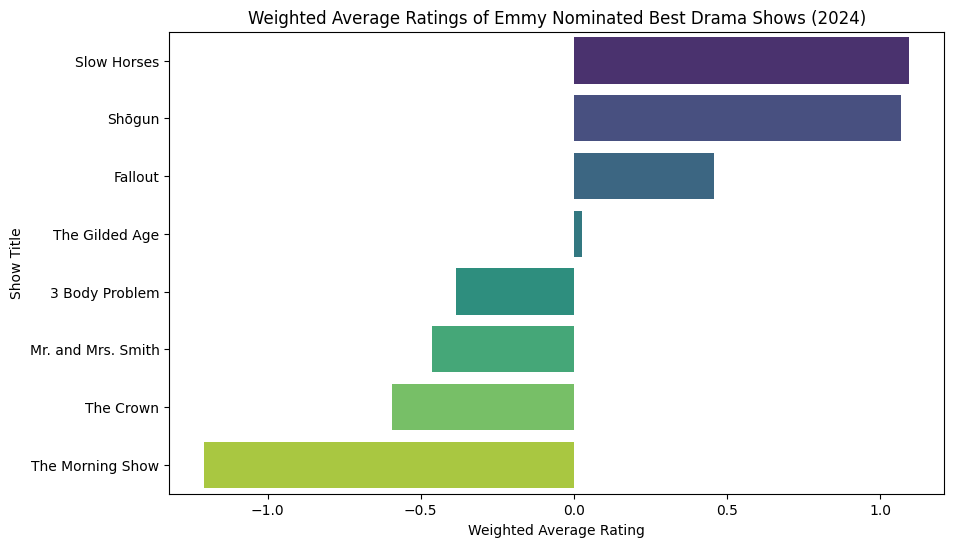

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Weighted Average Rating', y='Title', data=df, palette='viridis')
plt.title('Weighted Average Ratings of Emmy Nominated Best Drama Shows (2024)')
plt.xlabel('Weighted Average Rating')
plt.ylabel('Show Title')
plt.show()